In [2]:
import numpy as np
from gensim.test.utils import datapath, get_tmpfile
from gensim.corpora import WikiCorpus, MmCorpus
from gensim import corpora, models, similarities
from gensim.test.utils import datapath
from gensim.parsing.preprocessing import remove_stopwords
import dit
from dit.divergences import jensen_shannon_divergence
import matplotlib.pyplot as plt
import nltk
#nltk.download('stopwords')
import re
from gensim import corpora, models, similarities 
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from sklearn.utils import resample
import random as rd
from sklearn.cluster import KMeans

from scipy.spatial import distance

In [2]:
#import documents
documents = []
for i in range(1,10):
    f = open("bbc//politics//00"+str(i)+str(".txt"))
    documents.append(f.read())
for i in range(10,100):
    f = open("bbc//politics//0"+str(i)+str(".txt"))
    documents.append(f.read()) 
for i in range(100,401):
    f = open("bbc//politics//"+str(i)+str(".txt"))
    documents.append(f.read())    
    
for i in range(1,10):
    f = open("bbc//business//00"+str(i)+str(".txt"))
    documents.append(f.read())
for i in range(10,100):
    f = open("bbc//business//0"+str(i)+str(".txt"))
    documents.append(f.read()) 
for i in range(100,401):
    f = open("bbc//business//"+str(i)+str(".txt"))
    documents.append(f.read()) 
    
for i in range(1,10):
    f = open("bbc//sport//00"+str(i)+str(".txt"))
    documents.append(f.read())
for i in range(10,100):
    f = open("bbc//sport//0"+str(i)+str(".txt"))
    documents.append(f.read()) 
for i in range(100,401):
    f = open("bbc//sport//"+str(i)+str(".txt"), encoding = 'latin')
    documents.append(f.read())
    
for i in range(1,10):
    f = open("bbc//tech//00"+str(i)+str(".txt"))
    documents.append(f.read())
for i in range(10,100):
    f = open("bbc//tech//0"+str(i)+str(".txt"))
    documents.append(f.read()) 
for i in range(100,401):
    f = open("bbc//tech//"+str(i)+str(".txt"))
    documents.append(f.read())   
    
for i in range(1,10):
    f = open("bbc//entertainment//00"+str(i)+str(".txt"))
    documents.append(f.read())
for i in range(10,100):
    f = open("bbc//entertainment//0"+str(i)+str(".txt"))
    documents.append(f.read()) 
for i in range(100,386):
    f = open("bbc//entertainment//"+str(i)+str(".txt"))
    documents.append(f.read())    
        
    
    
names = np.array(["Theresa_May.txt","Tony_Blair.txt","Gordon_Brown.txt","Alec_Douglas.txt","David_Cameron.txt"
                  ,"Edward_Heath.txt","Harold_Wilson.txt","James_Callaghan.txt","John_Major.txt",
                  "Margaret_Thatcher.txt","Harold_Macmillan.txt","Anthony_Eden.txt","Winston_Churchill.txt"])

for name in names:
    #print(name)
    f = open("Text_Files//"+name,encoding="utf8")
    #documents.append(str(f.read()))

In [3]:
len(documents)

1985

In [4]:
def tokenize_only(text):
    '''
    This function is taken from Brandon Roze
    '''
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens


stopwords = nltk.corpus.stopwords.words('english')


In [5]:
#tokenize

%time tokenized_list = [tokenize_only(text) for text in documents]
print("ok")
#remove stop words
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_list]
print("ok")

CPU times: user 8.94 s, sys: 91.3 ms, total: 9.03 s
Wall time: 9.12 s
ok
CPU times: user 1.29 s, sys: 8.61 ms, total: 1.29 s
Wall time: 1.3 s
ok


In [6]:
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=0.1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

In [7]:
#%time lda = models.LdaModel(corpus, num_topics=20, id2word=dictionary, update_every=5, chunksize=10000, passes=100)

In [8]:
#lda.save("bbc_model_whole")

In [9]:
lda = models.LdaModel.load("bbc_model_whole")



Having successfully trained our model we can use it to give us a topic distribution over the politicians we are interested in.

In [10]:
names = np.array(["Theresa_May.txt","Tony_Blair.txt","Gordon_Brown.txt","Alec_Douglas.txt","David_Cameron.txt"
                  ,"Edward_Heath.txt","Harold_Wilson.txt","James_Callaghan.txt","John_Major.txt",
                  "Margaret_Thatcher.txt","Harold_Macmillan.txt","Anthony_Eden.txt","Winston_Churchill.txt","LFC_text.txt"])[:-1]
proper_names = ["Theresa May","Tony Blair","Gordon Brown","Alec Douglas","David Cameron","Edward Heath","Harold Wilson",
           "James Callaghan","John Major","Margaret Thatcher","Harold Macmillan","Anthony Eden","Winston Churchill"]

summary = []

for name in names:
    #print(name)
    f = open("Text_Files//"+name,encoding="utf8")
    summary.append(f.read())

In [11]:
#get the topic distribution for each politician
def topicz(text,no_topics):
    topic_distribution =[]
    for i in text:
        new_doc = i
        new_vec = dictionary.doc2bow(new_doc.lower().split())
        #new_vec = dictionary.doc2bow(new_doc)
        topic_distribution.append(lda[new_vec])

    topics = [[[x for x in y] for y in z] for z in topic_distribution]
    only_numbers = [[float(word[1]) for word in topic] for topic in topics]
    only_topics = [[word[0] for word in topic] for topic in topics]

    topic_matrix = np.zeros((len(text),no_topics))
    for i in range(len(text)):
        topic_matrix[i,only_topics[i]] = only_numbers[i]
    return only_topics,only_numbers,topic_matrix



only_topics,only_numbers,topic_matrix = topicz(summary,20)


IndexError: index 31024 is out of bounds for axis 1 with size 30990

In [12]:
#let's also make this a document - topic matric which we can apply PCA directly on.


In [25]:
lda.show_topics(formatted=False, num_words=20)

[(1,
  [('would', 0.007068245),
   ('new', 0.006422472),
   ('one', 0.005419768),
   ('ukip', 0.0050973278),
   ('also', 0.004338213),
   ('kilroy-silk', 0.0041818004),
   ("n't", 0.0038038273),
   ('deal', 0.0034378932),
   ('last', 0.0032002644),
   ('good', 0.002872353),
   ('two', 0.0028141171),
   ('number', 0.0027514894),
   ('time', 0.002744666),
   ('made', 0.0027001088),
   ('like', 0.0025927399),
   ('make', 0.0025914013),
   ('liverpool', 0.002456774),
   ('want', 0.002385017),
   ('think', 0.0023495595),
   ('first', 0.0022639954)]),
 (4,
  [('cards', 0.006666371),
   ('id', 0.00613429),
   ('children', 0.00534009),
   ('new', 0.0045487946),
   ('also', 0.004063315),
   ('brown', 0.0034255814),
   ('people', 0.0032200736),
   ('lord', 0.0030917204),
   ('added', 0.0029339113),
   ('world', 0.002620097),
   ('one', 0.0025636684),
   ('next', 0.0025126534),
   ('research', 0.0025034074),
   ('christmas', 0.0024961976),
   ('would', 0.0024162862),
   ('good', 0.0023452474),
  

In [12]:
plt.figure(figsize = (10,5))

for i in range(len(names)):
    plt.plot(topic_matrix[i,:],"o-", alpha = 0.6, color = (0.2, 0.5, i/13), 
             label = proper_names[i],markeredgecolor ="black")
    
#plt.plot(topic_matrix[13,:],"o-", alpha = 0.5, color = (1,0,0))

plt.grid()
plt.xticks(range(0,20),range(1,21))
plt.legend(bbox_to_anchor = (1,1),fontsize = "large")
plt.xlabel("Topic Number",fontsize  =12)
plt.ylabel("Probability",fontsize  =12)
#plt.savefig("Figures\\LDA_BBC\\DNA_politicians.pdf",bbox_inches="tight")

NameError: name 'topic_matrix' is not defined

<Figure size 720x360 with 0 Axes>

In [13]:
def sj_distance(only_topics,only_numbers):
    l = len(only_numbers)
    distance_matrix = np.zeros((l,l))
    for i in range(l):
        for j in range(l):
            #print(i,j)
            X = dit.ScalarDistribution(outcomes = only_topics[i],pmf = normalise(only_numbers[i]),validate = False,
                               base = "linear", sample_space = space)
            Y = dit.ScalarDistribution(outcomes = only_topics[j],pmf = normalise(only_numbers[j]),validate = False,
                               base = "linear", sample_space = space)
            distance_matrix[i,j] = np.sqrt(jensen_shannon_divergence([X,Y]))
    return distance_matrix

space = [i for i in range(0,20,1)]
print(space)

def normalise(list1):
    return (np.asarray(list1)/sum(list1))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [14]:
boot_all = []
seed = 100
for i in range(len(summary)):
    
    PM_text = summary[i] 
    temp_token = tokenize_only(PM_text)
    temp_length = len(temp_token)
    temp_boot = resample(temp_token, replace = False, n_samples = int(1*temp_length),random_state = seed)
    boot_all.append(temp_boot)
only_topics,only_numbers,topic_matrix = topicz(boot_all,20) 

#topic distributions are not normalised ==> need to do it manually
def normalise(list1):
    return (np.asarray(list1)/sum(list1))

normalise(only_numbers[0])
space = [i for i in range(0,20,1)]
print(space)


#need to do the above in a way tha create a distance matrix
#will use an array


distance_matrix = sj_distance(only_topics,only_numbers)



num_clusters = 3     #Set the number of clusters
km = KMeans(n_clusters=num_clusters)

%time km.fit(distance_matrix)     #timing the procedure

clusters = km.labels_.tolist()
c_list.append(clusters)
print (clusters)
print ()

plt.plot(clusters,proper_names, 'o', color = 'blue', markersize = 10)
plt.grid()
plt.xlabel("Cluster")
plt.ylabel("Politician")
#plt.savefig("KMeansClustering.pdf")
colours = ["red","green","blue","purple"]
#colours = [(0.2,0.5,0.2),(0.2,0.5,0.5),(0.2,0.5,0.9)]

shape = ["o", "^", "s", "X"]

#plt.savefig("Figures\\LDA_BBC\\politicians_k_means_boostrap_seed_"+str(seed)+".pdf")

#try to perform a PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

#coordinates = pca.fit_transform(distance_matrix)
coordinates = pca.fit_transform(topic_matrix)
#print(coordinates)
print(np.sum(np.abs(coordinates),axis = 0))


plt.figure()#figsize = (8,6)
for i, txt in enumerate(names):
    plt.plot(coordinates[i,0], coordinates[i,1],marker = shape[clusters[i]],color = colours[clusters[i]],
             markersize = 10,alpha = 0.9,markeredgecolor = "black", label = proper_names[i])
    plt.text(coordinates[i,0]+0.01, coordinates[i,1]*(1.04),s = proper_names[i],size=8
             ,bbox=dict(boxstyle="square",
                   ec=(1., 1.0, 1.0),
                   fc=(1., 1, 1),alpha = 0.6
                                                                                   
                   ))
#plt.legend(bbox_to_anchor=(1.1, 1.0))
plt.grid()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
#plt.savefig("Figures\\LDA_BBC\\politicians_PCA_boostrap_seed_"+str(seed)+".pdf")
#np.savetxt("Figures\\LDA_BBC\\c_list.txt",c_list)

AttributeError: 'list' object has no attribute 'lower'

### Using the LDA Model for Clustering of unlabelled text data.

We will use randomly selected documents from out corspus and is if the model clusters the data as we would expect it to.
The way we have constructed our corpus we can expted that the articles will have the following indexes:

politics 1:400

business 400:800

sport 800:1200

entertainment 1200:1600

tech 1600:2000

In [15]:
sample_numbers = [2,3,4,8,10,15,402,403,405,404,406,407,802,803,804,805,810,812,1202,1203,1206,1207,1210]
sample_numbers = range(1,1980,60)
sample = [documents[i] for i in sample_numbers]
only_topics1,only_numbers1,topic_matrix1 = topicz(sample,20)

In [16]:
len(sample)

33

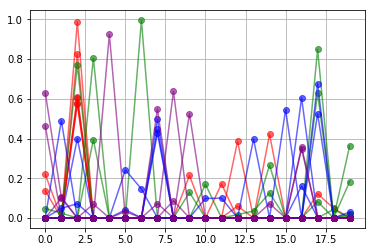

In [17]:
for i in range(6):
    plt.plot(topic_matrix1[i,:],"o-", alpha = 0.6, color = ("red"))
    
for i in range(6,12):
    plt.plot(topic_matrix1[i,:],"o-", alpha = 0.6, color = ("green"))    
    
for i in range(12,18):
    plt.plot(topic_matrix1[i,:],"o-", alpha = 0.6, color = ("blue"))   
    
for i in range(18,23):
    plt.plot(topic_matrix1[i,:],"o-", alpha = 0.6, color = ("purple"))    
        
#plt.plot(topic_matrix1[13,:],"o-", alpha = 0.5, color = (1,0,0))

plt.grid()

In [15]:
distance_matrix1 = sj_distance(only_topics1,only_numbers1)

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import ward, dendrogram, linkage

linkage_matrix = ward(distance_matrix1) #define the linkage_matrix using ward clustering pre-computed distances
#linkage_matrix = linkage(distance_matrix1)
#print(linkage_matrix)
titles = list(sample_numbers)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linkage_matrix, labels = titles, orientation = "right")
plt.savefig("Figures\\LDA_BBC\\LDA_BBC_dendrogram_step_60.pdf") #save figure as ward_clusters




plt.figure()

num_clusters = 5     #Set the number of clusters
km = KMeans(n_clusters=num_clusters,n_init = 1000)

%time km.fit(distance_matrix1)     #Fit K-Means using the distance matrix

clusters = km.labels_.tolist()
print (clusters)

plt.plot(clusters,sample_numbers, 'o', color = 'blue', markersize = 10)
plt.grid()
plt.xlabel("Cluster")
plt.ylabel("Article Reference Number")
plt.xticks(range(0,4), range(0,4))
plt.yticks(range(0,2000,400), range(0,2000,400))
#plt.savefig("KMeansClustering.pdf")

colours = ["red","green","blue","purple","black"]
#colours = [(0.2,0.5,0.2),(0.2,0.5,0.5),(0.2,0.5,0.9)]



shape = ["o", "^", "s", "X","P"]

#plt.savefig("Figures\\LDA_BBC\\politicians_k_means_boostrap_seed_"+str(seed)+".pdf")
#plt.savefig("Figures\\Traditional_BBC\\politicians_k_means_No_Boostrap.pdf")

#try to perform a PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

coordinates = pca.fit_transform(distance_matrix1)
#print(coordinates)
#print(np.sum(np.abs(coordinates),axis = 0))


plt.figure()#figsize = (8,6)
for i, txt in enumerate(sample_numbers):
    
    plt.plot(coordinates[i,0], coordinates[i,1],marker = shape[clusters[i]],color = colours[clusters[i]],
         markersize = 10,alpha = 0.9,markeredgecolor = "black", label = sample_numbers[i])
    plt.text(coordinates[i,0]+0.03, coordinates[i,1]*(1.05)-0.01,s = sample_numbers[i],size=8
             ,bbox=dict(boxstyle="square",
               ec=(1., 1.0, 1.0),
               fc=(1., 1, 1),alpha = 0))

#plt.legend(bbox_to_anchor=(1.1, 1.0))
plt.grid()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
#plt.savefig("Figures\\Traditional_BBC\\Politicians_PCA_Boostrap_Seed_"+str(seed)+".pdf")
#plt.savefig("Figures\\Traditional_BBC\\Politicians_PCA_No_Boostrap.pdf")
#np.savetxt("quality_tou_kinitou_sou.txt",pplist)

NameError: name 'only_topics1' is not defined

/Users/marioskassapis/anaconda3/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


CPU times: user 1.78 s, sys: 6.17 ms, total: 1.79 s
Wall time: 1.8 s
[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 2, 4, 4, 0, 0, 0, 1, 0, 0]


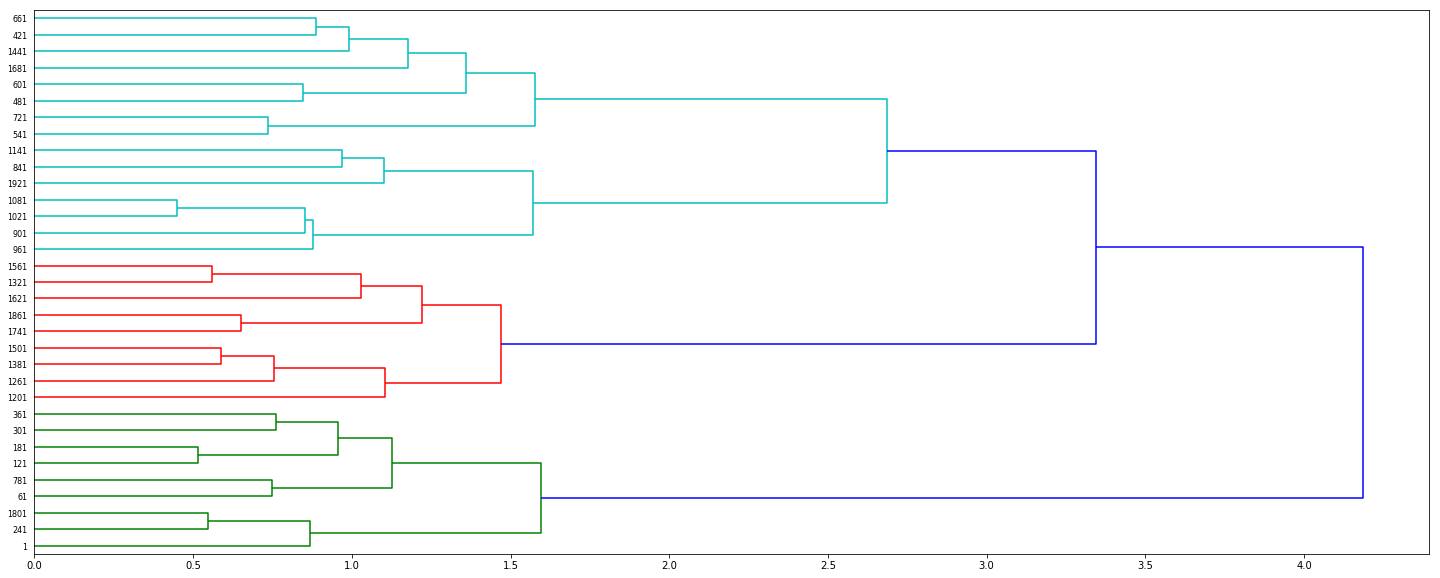

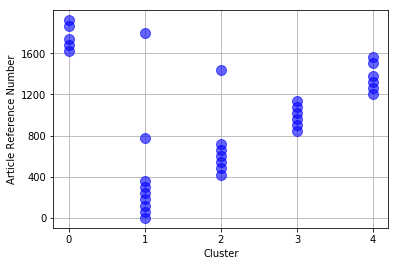

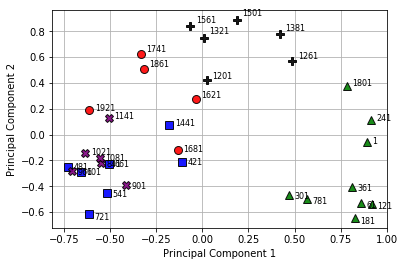

In [38]:
sample_numbers = [2,3,4,8,10,15,402,403,405,404,406,407,802,803,804,805,810,812,1202,1203,1206,1207,1210]
sample_numbers = range(1,1980,60)
sample = [documents[i] for i in sample_numbers]
only_topics1,only_numbers1,topic_matrix1 = topicz(sample,20)

run = 88

distance_matrix1 = sj_distance(only_topics1,only_numbers1)

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import ward, dendrogram, linkage

linkage_matrix = ward(distance_matrix1) #define the linkage_matrix using ward clustering pre-computed distances
#linkage_matrix = linkage(distance_matrix1)
#print(linkage_matrix)
titles = list(sample_numbers)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linkage_matrix, labels = titles, orientation = "right")
#plt.savefig("Figures\\LDA_BBC\\LDA_BBC_dendrogram_step_60.pdf") #save figure as ward_clusters
plt.savefig("Figures//LDA_BBC//BBC_dendrogram_comparison_eleos"+".pdf")



plt.figure()

num_clusters = 5    #Set the number of clusters
km = KMeans(n_clusters=num_clusters,n_init = 1000,max_iter= 600)



%time km.fit(distance_matrix1)     #Fit K-Means using the distance matrix

clusters = km.labels_.tolist()
print(clusters)

plt.plot(clusters,sample_numbers, 'o', color = 'blue', markersize = 10,alpha = 0.6)
plt.grid()
plt.xlabel("Cluster")
plt.ylabel("Article Reference Number")
plt.xticks(range(0,5), range(0,5))
plt.yticks(range(0,2000,400), range(0,2000,400))
#plt.savefig("KMeansClustering.pdf")
colours = ["red","green","blue","purple","black"]
#colours = [(0.2,0.5,0.2),(0.2,0.5,0.5),(0.2,0.5,0.9)]


shape = ["o", "^", "s", "X","P"]

#plt.savefig("Figures\\LDA_BBC\\politicians_k_means_boostrap_seed_"+str(seed)+".pdf")
plt.savefig("Figures//LDA_BBC//5_BBC_k_means_No_Boostrap_" + str(run) + ".pdf")

#try to perform a PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4, random_state = 8)

coordinates = pca.fit_transform(distance_matrix1)
#print(coordinates)
#print(np.sum(np.abs(coordinates),axis = 0))


plt.figure()#figsize = (8,6)
for i, txt in enumerate(sample_numbers):
    
    plt.plot(coordinates[i,0], coordinates[i,1],marker = shape[clusters[i]],color = colours[clusters[i]],
         markersize = 8,alpha = 0.9,markeredgecolor = "black", label = sample_numbers[i])
    plt.text(coordinates[i,0]+0.03, coordinates[i,1]*(1.05)-0.01,s = sample_numbers[i],size=8
             ,bbox=dict(boxstyle="square",
               ec=(1., 1.0, 1.0),
               fc=(1., 1, 1),alpha = 0))

#plt.legend(bbox_to_anchor=(1.1, 1.0))
plt.grid()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
#plt.savefig("Figures\\Traditional_BBC\\Politicians_PCA_Boostrap_Seed_"+str(seed)+".pdf")
plt.savefig("Figures//LDA_BBC//5_BBC_PCA_No_Boostrap_" + str(run) + ".pdf")
#np.savetxt("quality_tou_kinitou_sou.txt",pplist)

In [30]:
print(clusters)

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 1, 4, 4, 2, 1, 2, 0, 2, 2]


In [31]:
list1 =[j for j in [0,4,3,2,1] for i in range(0,20)]

ones = np.asarray(list1[:-1])==np.asarray(clusters)
score = sum(ones*1)/len(ones)
print(score)

step = 20
cut_ones = [ones[i:i+step] for i in range(0,100,step)]
cut_ones

scores = [sum(o)/len(o) for o in cut_ones]
print(scores)
print(np.mean(scores))

0.7373737373737373
[1.0, 0.5, 0.9, 0.65, 0.631578947368421]
0.7363157894736843


[1.0, 0.5, 0.85, 0.65, 0.6842105263157895]

0.7368421052631579

Figures start here:

[1.0, 0.5, 0.9, 0.65, 0.631578947368421]

0.7363157894736843

Wall time: 3.99 s
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1]


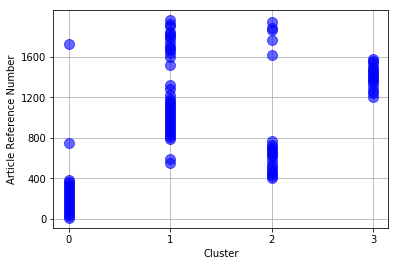

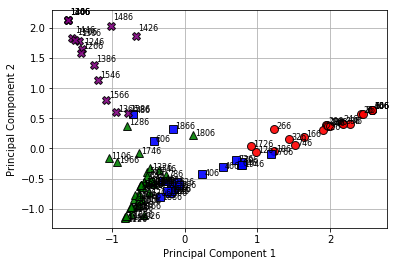

In [56]:
run = 6
sample_numbers = range(run,1980,20)
sample = [documents[i] for i in sample_numbers]
only_topics1,only_numbers1,topic_matrix1 = topicz(sample,20)



distance_matrix1 = sj_distance(only_topics1,only_numbers1)

from sklearn.cluster import KMeans

plt.figure()

num_clusters = 4    #Set the number of clusters
km = KMeans(n_clusters=num_clusters,n_init = 1000,max_iter= 600)



%time km.fit(distance_matrix1)     #Fit K-Means using the distance matrix

clusters = km.labels_.tolist()
print(clusters)

plt.plot(clusters,sample_numbers, 'o', color = 'blue', markersize = 10,alpha = 0.6)
plt.grid()
plt.xlabel("Cluster")
plt.ylabel("Article Reference Number")
plt.xticks(range(0,num_clusters), range(0,num_clusters))
plt.yticks(range(0,2000,400), range(0,2000,400))
#plt.savefig("KMeansClustering.pdf")
colours = ["red","green","blue","purple","black"]
#colours = [(0.2,0.5,0.2),(0.2,0.5,0.5),(0.2,0.5,0.9)]


shape = ["o", "^", "s", "X","P"]

#plt.savefig("Figures\\LDA_BBC\\politicians_k_means_boostrap_seed_"+str(seed)+".pdf")
plt.savefig("Figures\\LDA_BBC\\4_BBC_k_means_No_Boostrap_" + str(run) + ".pdf")

#try to perform a PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4, random_state = 8)

coordinates = pca.fit_transform(distance_matrix1)
#print(coordinates)
#print(np.sum(np.abs(coordinates),axis = 0))


plt.figure()#figsize = (8,6)
for i, txt in enumerate(sample_numbers):
    
    plt.plot(coordinates[i,0], coordinates[i,1],marker = shape[clusters[i]],color = colours[clusters[i]],
         markersize = 8,alpha = 0.9,markeredgecolor = "black", label = sample_numbers[i])
    plt.text(coordinates[i,0]+0.03, coordinates[i,1]*(1.05)-0.01,s = sample_numbers[i],size=8
             ,bbox=dict(boxstyle="square",
               ec=(1., 1.0, 1.0),
               fc=(1., 1, 1),alpha = 0))

#plt.legend(bbox_to_anchor=(1.1, 1.0))
plt.grid()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
#plt.savefig("Figures\\Traditional_BBC\\Politicians_PCA_Boostrap_Seed_"+str(seed)+".pdf")
plt.savefig("Figures\\LDA_BBC\\4_BBC_PCA_No_Boostrap_" + str(run) + ".pdf")
#np.savetxt("quality_tou_kinitou_sou.txt",pplist)

In [58]:
print(clusters)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1]


In [59]:
list1 =[j for j in [0,2,1,3,1] for i in range(0,20)]

ones = np.asarray(list1[:-1])==np.asarray(clusters)
score = sum(ones*1)/len(ones)
print(score)

step = 20
cut_ones = [ones[i:i+step] for i in range(0,100,step)]
cut_ones

scores = [sum(o)/len(o) for o in cut_ones]
print(scores)
print(np.mean(scores))

0.8585858585858586
[1.0, 0.8, 1.0, 0.8, 0.6842105263157895]
0.8568421052631578


In [60]:
sclist = [0.8487,0.77796,0.88059,0.86776,0.86801,0.860526]

[1.0, 0.8, 0.9, 0.7, 0.7894736842105263]

0.8378947368421054

score: 0.8487

run 1: 

[1.0, 0.8, 0.9, 0.7, 0.7894736842105263]

score: 0.8487

run 2:

[0.95, 0.6, 0.95, 0.85, 0.47368421052631576]

score: 0.77796

run 3:

[0.95, 0.75, 0.95, 0.9, 0.8947368421052632]

score: 0.88059

run 4:

[1.0, 0.7, 1.0, 0.85, 0.8421052631578947]

score: 0.86776

run 5:

[0.95, 0.95, 0.85, 0.75, 0.8947368421052632]

score: 0.86801

run 6:

[1.0, 0.8, 1.0, 0.8, 0.6842105263157895]

score: 0.860526

Wall time: 7.51 s
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0]


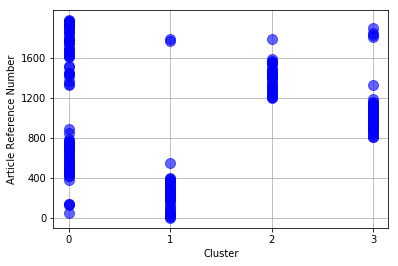

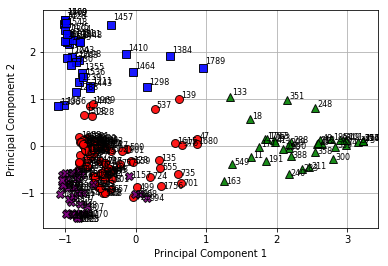

In [105]:
run = 6

rd.seed(run)
indices = [range(i,i+400) for i in range(0,1600,400)]
indices.append(range(1600,1986))

sample = [rd.sample(index,k=40) for index in indices]
ss = [x for y in sample for x in y]
sample = [documents[i] for i in ss]


only_topics1,only_numbers1,topic_matrix1 = topicz(sample,20)



distance_matrix1 = sj_distance(only_topics1,only_numbers1)

from sklearn.cluster import KMeans

plt.figure()

num_clusters = 4    #Set the number of clusters
km = KMeans(n_clusters=num_clusters,n_init = 1000,max_iter= 600)



%time km.fit(distance_matrix1)     #Fit K-Means using the distance matrix

clusters = km.labels_.tolist()
print(clusters)

plt.plot(clusters,ss, 'o', color = 'blue', markersize = 10,alpha = 0.6)
plt.grid()
plt.xlabel("Cluster")
plt.ylabel("Article Reference Number")
plt.xticks(range(0,num_clusters), range(0,num_clusters))
plt.yticks(range(0,2000,400), range(0,2000,400))
#plt.savefig("KMeansClustering.pdf")
colours = ["red","green","blue","purple","black"]
#colours = [(0.2,0.5,0.2),(0.2,0.5,0.5),(0.2,0.5,0.9)]


shape = ["o", "^", "s", "X","P"]

#plt.savefig("Figures\\LDA_BBC\\politicians_k_means_boostrap_seed_"+str(seed)+".pdf")
plt.savefig("Figures\\LDA_BBC\\4_BBC_k_means_No_Boostrap_" + str(run) + ".pdf")

#try to perform a PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4, random_state = 8)

coordinates = pca.fit_transform(distance_matrix1)
#print(coordinates)
#print(np.sum(np.abs(coordinates),axis = 0))


plt.figure()#figsize = (8,6)
for i, txt in enumerate(ss):
    
    plt.plot(coordinates[i,0], coordinates[i,1],marker = shape[clusters[i]],color = colours[clusters[i]],
         markersize = 8,alpha = 0.9,markeredgecolor = "black", label = ss[i])
    plt.text(coordinates[i,0]+0.03, coordinates[i,1]*(1.05)-0.01,s = ss[i],size=8
             ,bbox=dict(boxstyle="square",
               ec=(1., 1.0, 1.0),
               fc=(1., 1, 1),alpha = 0))

#plt.legend(bbox_to_anchor=(1.1, 1.0))
plt.grid()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
#plt.savefig("Figures\\Traditional_BBC\\Politicians_PCA_Boostrap_Seed_"+str(seed)+".pdf")
plt.savefig("Figures\\LDA_BBC\\4_BBC_PCA_No_Boostrap_" + str(run) + ".pdf")
#np.savetxt("quality_tou_kinitou_sou.txt",pplist)

In [19]:
#get the topic distribution for each politician
def topicz_fast(text,no_topics):
    topic_distribution =[]
    for i in text:
        new_doc = i
        new_vec = dictionary.doc2bow(new_doc.lower().split())
        #new_vec = dictionary.doc2bow(new_doc)
        topic_distribution.append(lda[new_vec])

    topics = [[[x for x in y] for y in z] for z in topic_distribution]
    only_numbers = [[float(word[1]) for word in topic] for topic in topics]
    only_topics = [[word[0] for word in topic] for topic in topics]


    return only_topics,only_numbers



#only_topics,only_numbers,topic_matrix = topicz(summary,20)


In [22]:
c_data = []
for run in range(0,1):
    print(run)
    rd.seed(run)
    indices = [range(i,i+400) for i in range(0,1600,400)]
    indices.append(range(1600,1986))

    sample = [rd.sample(index,k=40) for index in indices]
    ss = [x for y in sample for x in y]
    sample = [documents[i] for i in ss]


    %time only_topics1,only_numbers1= topicz_fast(sample,20)
    distance_matrix1 = sj_distance(only_topics1,only_numbers1)


    num_clusters = 4    #Set the number of clusters
    km = KMeans(n_clusters=num_clusters,n_init = 1000,max_iter= 600)



    %time km.fit(distance_matrix1)     #Fit K-Means using the distance matrix

    clusters = km.labels_.tolist()
    c_data.append(clusters)

0
CPU times: user 461 ms, sys: 9.12 ms, total: 470 ms
Wall time: 269 ms
CPU times: user 7.03 s, sys: 22 ms, total: 7.06 s
Wall time: 3.55 s


In [23]:
clusters = c_data[0]
print(clusters)

[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2]


In [24]:
list1 =[j for j in [3,2,1,0,1] for i in range(0,40)]

ones = np.asarray(list1)==np.asarray(clusters)
score = sum(ones*1)/len(ones)
print(score)

step = 40
cut_ones = [ones[i:i+step] for i in range(0,200,step)]
cut_ones

scores = [sum(o)/len(o) for o in cut_ones]
print(scores)
#scoradia.append(scores)
print(np.mean(scores))

0.335
[0.0, 0.85, 0.05, 0.025, 0.75]
0.335


In [166]:
#np.savetxt("gamo_ton_kassapi.txt",scoradia)

In [165]:
final_scores = [0.809375,0.81875,0.90000,0.884375,0.91875,0.81250,0.828125,0.86250,0.84375,0.834375]
m_score = np.mean(final_scores)
std_score = np.std(final_scores)
print(m_score,std_score)

0.85125 0.036529097990506146


In [162]:
#scoradia = [[0.925, 0.9, 0.975, 0.65, 0.725], [0.95, 0.775, 0.95, 0.675, 0.8], [0.925, 0.925, 1.0, 0.775, 0.875], [1.0, 0.8, 0.925, 0.775, 0.875], [0.95, 0.875, 0.975, 0.875, 0.875], [0.975, 0.6, 0.975, 0.8, 0.775], [0.925, 0.75, 0.975, 0.75, 0.8], [0.975, 0.775, 0.975, 0.825, 0.775], [0.975, 0.775, 1.0, 0.775, 0.7]]

In [167]:
data5 = []
for run in range(0,10):
    print(run)
    rd.seed(run)
    indices = [range(i,i+400) for i in range(0,1600,400)]
    indices.append(range(1600,1986))

    sample = [rd.sample(index,k=40) for index in indices]
    ss = [x for y in sample for x in y]
    sample = [documents[i] for i in ss]


    %time only_topics1,only_numbers1= topicz_fast(sample,20)
    %time distance_matrix1 = sj_distance(only_topics1,only_numbers1)


    num_clusters = 5    #Set the number of clusters
    km = KMeans(n_clusters=num_clusters,n_init = 1000,max_iter= 600)



    %time km.fit(distance_matrix1)     #Fit K-Means using the distance matrix

    clusters = km.labels_.tolist()
    data5.append(clusters)

0
Wall time: 399 ms
Wall time: 7.97 s
1
Wall time: 350 ms
Wall time: 7.52 s
2
Wall time: 336 ms
Wall time: 7.34 s
3
Wall time: 502 ms
Wall time: 7.3 s
4
Wall time: 387 ms
Wall time: 7.12 s
5
Wall time: 507 ms
Wall time: 7.51 s
6
Wall time: 368 ms
Wall time: 6.74 s
7
Wall time: 376 ms
Wall time: 7.7 s
8
Wall time: 337 ms
Wall time: 7.27 s
9
Wall time: 389 ms
Wall time: 6.79 s


In [175]:
#trapezi = []

In [209]:
clusters = data5[9]
print(clusters)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 2, 0, 4, 1, 4, 4, 0, 4, 0, 4, 4, 4, 4, 0, 4, 0, 0, 4, 4, 0, 4, 4, 1, 4, 4, 4, 0, 0, 0, 0, 0, 4, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [210]:
list1 =[j for j in [1,4,3,2,0] for i in range(0,40)]

ones = np.asarray(list1)==np.asarray(clusters)
score = sum(ones*1)/len(ones)
#print(score)

step = 40
cut_ones = [ones[i:i+step] for i in range(0,200,step)]
cut_ones

scores = [sum(o)/len(o) for o in cut_ones]
print(scores)
trapezi.append(scores)
print(np.mean(scores))
scoration.append(np.mean(scores))

[1.0, 0.7, 0.575, 0.725, 0.825]
0.765


In [214]:
#List of appended means
print(scoration)     

[0.79, 0.8, 0.8150000000000001, 0.8549999999999999, 0.8099999999999999, 0.8150000000000001, 0.805, 0.825, 0.8400000000000001, 0.765]


In [215]:
#List of appended scores
print(trapezi)

[[0.925, 0.7, 0.975, 0.65, 0.7], [0.95, 0.775, 0.875, 0.675, 0.725], [0.925, 0.65, 0.975, 0.75, 0.775], [1.0, 0.775, 0.875, 0.775, 0.85], [0.925, 0.625, 0.975, 0.85, 0.675], [0.95, 0.6, 0.95, 0.8, 0.775], [0.925, 0.75, 0.8, 0.75, 0.8], [0.925, 0.775, 0.85, 0.825, 0.75], [0.975, 0.775, 0.975, 0.775, 0.7], [1.0, 0.7, 0.575, 0.725, 0.825]]


In [216]:
np.mean(scoration)

0.8119999999999999

In [218]:
cluster_score5 =  [[0.925, 0.7, 0.975, 0.65, 0.7],
 [0.95, 0.775, 0.875, 0.675, 0.725],
 [0.925, 0.65, 0.975, 0.75, 0.775],
 [1.0, 0.775, 0.875, 0.775, 0.85],
 [0.925, 0.625, 0.975, 0.85, 0.675],
 [0.95, 0.6, 0.95, 0.8, 0.775],
 [0.925, 0.75, 0.8, 0.75, 0.8],
 [0.925, 0.775, 0.85, 0.825, 0.75],
 [0.975, 0.775, 0.975, 0.775, 0.7],
 [1.0, 0.7, 0.575, 0.725, 0.825]]

We now have 4 different lists, 2 for the run with 4 clusters, 2 for the run with 5 clusters:

- cluster_score4
- cluster_meanscore4
- cluster_score5
- cluster_meanscore5

In [12]:
data3 = []
for run in range(0,10):
    print(run)
    rd.seed(run)
    indices = [range(i,i+400) for i in range(0,1600,400)]
    indices.append(range(1600,1986))

    sample = [rd.sample(index,k=40) for index in indices]
    ss = [x for y in sample for x in y]
    sample = [documents[i] for i in ss]


    %time only_topics1,only_numbers1= topicz_fast(sample,20)
    %time distance_matrix1 = sj_distance(only_topics1,only_numbers1)


    num_clusters = 3    #Set the number of clusters
    km = KMeans(n_clusters=num_clusters,n_init = 1000,max_iter= 600)



    %time km.fit(distance_matrix1)     #Fit K-Means using the distance matrix

    clusters = km.labels_.tolist()
    data3.append(clusters)

0
CPU times: user 399 ms, sys: 4.69 ms, total: 404 ms
Wall time: 226 ms
CPU times: user 1min 9s, sys: 616 ms, total: 1min 10s
Wall time: 1min 10s
CPU times: user 5.97 s, sys: 14.7 ms, total: 5.99 s
Wall time: 3 s
1
CPU times: user 386 ms, sys: 2.79 ms, total: 389 ms
Wall time: 191 ms
CPU times: user 1min 9s, sys: 729 ms, total: 1min 10s
Wall time: 1min 9s
CPU times: user 7.5 s, sys: 26 ms, total: 7.52 s
Wall time: 3.8 s
2


IndexError: index 30990 is out of bounds for axis 1 with size 30990

CPU times: user 1min 9s, sys: 708 ms, total: 1min 9s
Wall time: 1min 9s
CPU times: user 6.48 s, sys: 21 ms, total: 6.5 s
Wall time: 3.32 s
3
CPU times: user 481 ms, sys: 3.53 ms, total: 485 ms
Wall time: 265 ms
CPU times: user 1min 10s, sys: 597 ms, total: 1min 11s
Wall time: 1min 11s
CPU times: user 6.22 s, sys: 34.4 ms, total: 6.26 s
Wall time: 3.18 s
4
CPU times: user 578 ms, sys: 7.41 ms, total: 585 ms
Wall time: 303 ms
CPU times: user 1min 16s, sys: 731 ms, total: 1min 17s
Wall time: 1min 18s
CPU times: user 8.12 s, sys: 60.8 ms, total: 8.18 s
Wall time: 4.33 s
5
CPU times: user 489 ms, sys: 3.52 ms, total: 492 ms
Wall time: 258 ms
CPU times: user 1min 21s, sys: 894 ms, total: 1min 22s
Wall time: 1min 25s
CPU times: user 8.02 s, sys: 58.3 ms, total: 8.07 s
Wall time: 4.2 s
6
CPU times: user 383 ms, sys: 2.68 ms, total: 386 ms
Wall time: 196 ms
CPU times: user 1min 12s, sys: 633 ms, total: 1min 12s
Wall time: 1min 13s
CPU times: user 5.65 s, sys: 15 ms, total: 5.66 s
Wall time: 2.8

IndexError: index 30990 is out of bounds for axis 1 with size 30990

CPU times: user 1min 11s, sys: 648 ms, total: 1min 12s
Wall time: 1min 12s
CPU times: user 6.9 s, sys: 21.3 ms, total: 6.92 s
Wall time: 3.47 s
9
CPU times: user 399 ms, sys: 2.74 ms, total: 402 ms
Wall time: 202 ms
CPU times: user 1min 11s, sys: 667 ms, total: 1min 11s
Wall time: 1min 11s
CPU times: user 6.36 s, sys: 29.4 ms, total: 6.39 s
Wall time: 3.23 s


In [15]:
len(data3)

10

In [19]:
#cluster_score3 = []

In [57]:
clusters = data3[9]
print(clusters)

[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]


In [18]:
list1 =[j for j in [0,2,2,1,1] for i in range(0,40)]

ones = np.asarray(list1)==np.asarray(clusters)
score = sum(ones*1)/len(ones)
#print(score)

step = 40
cut_ones = [ones[i:i+step] for i in range(0,200,step)]
cut_ones

scores = [sum(o)/len(o) for o in cut_ones]
print(scores)
cluster_score3.append(scores)

NameError: name 'clusters' is not defined

In [61]:
sks = scores[0] + scores[1]*(0.5) + scores[2]*(0.5) + scores[3]*(0.5) + scores[4]*(0.5)
ole = sks / 3

print(ole)


0.9375


In [55]:
sks = scores[0] + (scores[1] / 3) + scores[2]/3 + scores[3]/1 + scores[4] / 3
ole = sks / 3

print(ole)


0.936111111111111


In [27]:
cluster_score3

[[0.925, 0.775, 0.95, 0.9, 0.75],
 [0.975, 0.975, 0.925, 0.95, 0.675],
 [0.975, 0.975, 0.925, 0.95, 0.675]]

In [63]:
cluster_meanscore3 = [0.87083, 0.9125, 0.9125, 0.9278, 0.911111, 0.9027777777777778, 0.9027777777777778,
                     0.936111111111111,0.936111111111111,0.9375]

In [64]:
len(cluster_meanscore3)

10

In [65]:
len(cluster_score3)

12

In [68]:
cluster_score3

[[0.925, 0.775, 0.95, 0.9, 0.75],
 [0.975, 0.975, 0.925, 0.95, 0.675],
 [0.975, 0.975, 0.925, 0.95, 0.675],
 [0.925, 0.825, 1.0, 1.0, 0.75],
 [1.0, 0.825, 1.0, 0.925, 0.6],
 [0.925, 0.825, 0.925, 0.975, 0.775],
 [0.95, 0.775, 0.85, 1.0, 0.65],
 [0.95, 0.775, 0.85, 1.0, 0.65],
 [0.975, 0.875, 1.0, 0.925, 0.85],
 [0.975, 0.875, 1.0, 0.925, 0.85],
 [0.0, 0.925, 0.95, 0.95, 0.85]]

In [67]:
cluster_score3.pop(-1)

[0.975, 0.925, 0.95, 0.95, 0.85]

In [69]:
cluster_score3.pop(-2)

[0.975, 0.875, 1.0, 0.925, 0.85]

In [70]:
len(cluster_score3)

10

In [17]:
data1 = []
#wcss= []

for run in range(0,1):
    print(run)
    rd.seed(run)
    indices = [range(i,i+400) for i in range(0,1600,400)]
    indices.append(range(1600,1986))

    sample = [rd.sample(index,k=40) for index in indices]
    ss = [x for y in sample for x in y]
    sample = [documents[i] for i in ss]


    %time only_topics1,only_numbers1= topicz_fast(sample,20)
    %time distance_matrix1 = sj_distance(only_topics1,only_numbers1)


    num_clusters = 8    #Set the number of clusters
    km = KMeans(n_clusters=num_clusters,n_init = 1000,max_iter= 600)



    %time km.fit(distance_matrix1)     #Fit K-Means using the distance matrix

    clusters = km.labels_.tolist()
    data1.append(clusters)
    
    #wcss.append(km.inertia_)

0


NameError: name 'topicz_fast' is not defined

NameError: name 'only_topics1' is not defined

NameError: name 'distance_matrix1' is not defined

AttributeError: 'KMeans' object has no attribute 'labels_'

In [16]:
wcss

NameError: name 'wcss' is not defined

In [26]:
wcss = [618.8060737182202,
        444.2363684554531,
 368.130316959842,
 315.7834380083229,
 284.25670553208676,
 267.1833245019628,
 254.51622260380609,
 ]

Text(0, 0.5, 'Within Cluster Spread Score')

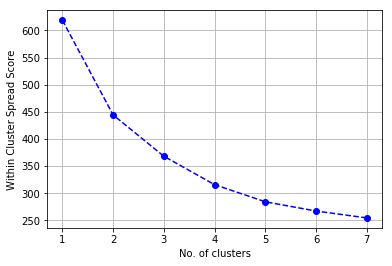

In [28]:
space = [1,2,3,4,5,6,7]
plt.plot(space, wcss, 'o--', color = 'blue')
plt.grid()
plt.xlabel("No. of clusters")
plt.ylabel("Within Cluster Spread Score")



In [ ]:
secondDerivative[i] = x[i+1] + x[i-1] - 2 * x[i]


CPU times: user 380 ms, sys: 3.84 ms, total: 384 ms
Wall time: 222 ms
CPU times: user 1min 10s, sys: 586 ms, total: 1min 10s
Wall time: 1min 10s


/Users/marioskassapis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


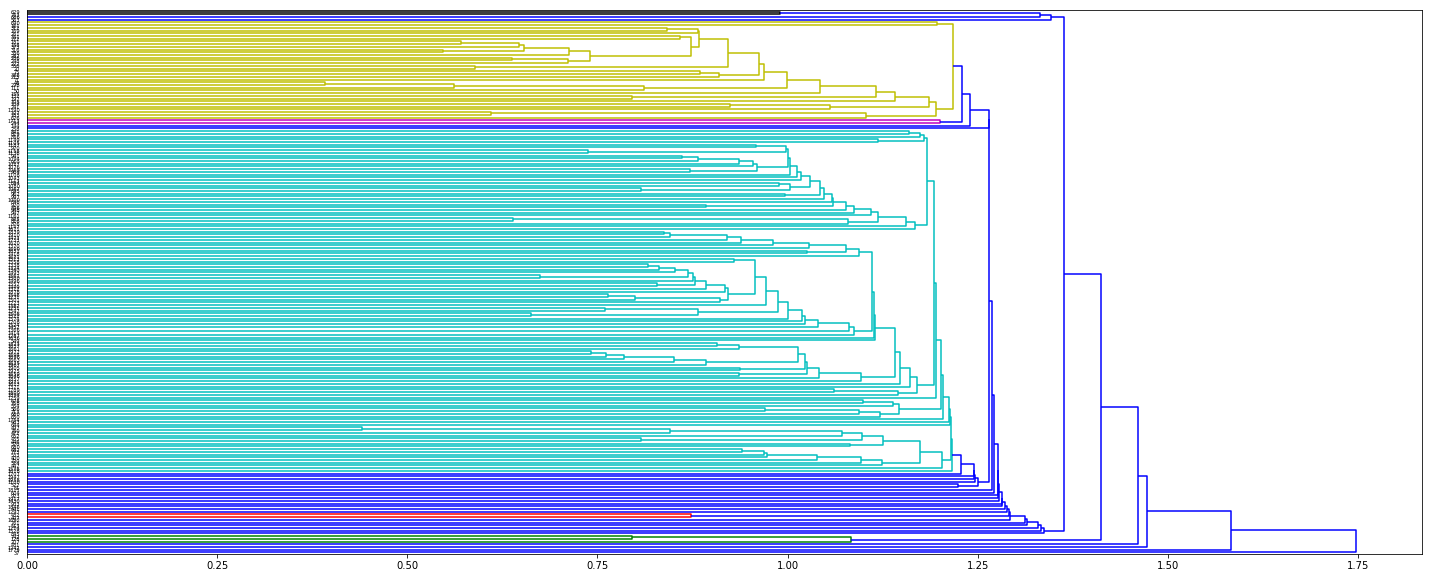

In [50]:
run = 0
rd.seed(run)
indices = [range(i,i+400) for i in range(0,1600,400)]
indices.append(range(1600,1986))

sample = [rd.sample(index,k=40) for index in indices]
ss = [x for y in sample for x in y]
sample = [documents[i] for i in ss]
sample_numbers = ss
summary = sample


%time only_topics1,only_numbers1= topicz_fast(sample,20)
%time distance_matrix1 = sj_distance(only_topics1,only_numbers1)


from scipy.cluster.hierarchy import ward, dendrogram, linkage

#linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances
linkage_matrix = linkage(distance_matrix1)
#print(linkage_matrix)
titles = sample_numbers

#uncomment below to save figure

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linkage_matrix, labels = titles, orientation = "right")

### Will now use kmeans repeatedly to get good data to the wcss and produce the final curve from which to extract the elbow plot

In [85]:
data1 = []
wcss8= []

for run in range(0,10):
    print(run)
    rd.seed(run)
    indices = [range(i,i+400) for i in range(0,1600,400)]
    indices.append(range(1600,1986))

    sample = [rd.sample(index,k=40) for index in indices]
    ss = [x for y in sample for x in y]
    sample = [documents[i] for i in ss]


    %time only_topics1,only_numbers1= topicz_fast(sample,20)
    %time distance_matrix1 = sj_distance(only_topics1,only_numbers1)


    num_clusters = 8  #Set the number of clusters
    km = KMeans(n_clusters=num_clusters,n_init = 1000,max_iter= 600)



    %time km.fit(distance_matrix1)     #Fit K-Means using the distance matrix

    clusters = km.labels_.tolist()
    data1.append(clusters)
    
    wcss8.append(km.inertia_)

0
Wall time: 293 ms
Wall time: 1min 11s
Wall time: 7.42 s
1
Wall time: 303 ms
Wall time: 1min 12s
Wall time: 7.2 s
2


IndexError: index 30995 is out of bounds for axis 1 with size 30990

Wall time: 1min 12s
Wall time: 7.65 s
3
Wall time: 315 ms
Wall time: 1min 15s
Wall time: 6.19 s
4
Wall time: 275 ms
Wall time: 1min 3s
Wall time: 4.95 s
5
Wall time: 234 ms
Wall time: 50 s
Wall time: 5.18 s
6
Wall time: 200 ms
Wall time: 49.8 s
Wall time: 4.9 s
7
Wall time: 221 ms
Wall time: 48.7 s
Wall time: 5.63 s
8
Wall time: 203 ms
Wall time: 49.4 s
Wall time: 4.89 s
9
Wall time: 198 ms
Wall time: 48.9 s
Wall time: 5.52 s


In [3]:
wcss_all = [0,0,0,0,0,0,0,0]
wcss_errors = [0,0,0,0,0,0,0,0]
wcss5 = [365.8517022451507,
 369.27458381468966,
 369.27458381468966,
 357.37308279723584,
 355.3611608489805,
 372.1940335058321,
 350.2631890790028,
 352.3201754962704,
 354.65301130022533,
 365.49459723436553]
wcss_all[4] = np.mean(wcss5)
wcss_errors[4] = np.std(wcss5)

In [4]:
wcss4 = [452.4932783953735,
 442.63525140753256,
 442.63525140753256,
 436.7079952573893,
 421.64552955983424,
 434.0617994242098,
 430.00404981684824,
 427.2091550799206,
 442.7612226630856,
 437.5800410864516]
wcss_all[3] = np.mean(wcss4)
wcss_errors[3] = np.std(wcss4)

In [5]:
wcss3 = [550.4054258617919,
 578.3312059137883,
 578.3312059137883,
 556.5327102620405,
 526.5372278687695,
 544.479274306846,
 546.5217664477417,
 546.7983564014974,
 559.1323689843008,
 572.2487895276394]
wcss_all[2] = np.mean(wcss3)
wcss_errors[2] = np.std(wcss3)

In [6]:
wcss2 = [659.9618107303913,
 724.4252433071149,
 724.4252433071149,
 711.4792294134858,
 720.2097194188252,
 697.0611003511606,
 707.0436304007268,
 724.1149756142789,
 725.843275373763,
 717.0101818036917]
wcss_all[1] = np.mean(wcss2)
wcss_errors[1] = np.std(wcss2)

In [7]:
wcss1 = [932.4496972590266,
 907.5230536537258,
 907.5230536537258,
 973.1869730380811,
 947.0179578301671,
 919.5922811714188,
 990.7635023455349,
 1015.9501505758146,
 945.837548459281,
 969.6457720125708]
wcss_all[0] = np.mean(wcss1)
wcss_errors[0] = np.std(wcss1)

In [8]:
wcss6 = [331.9849141035523,
 346.0227443397288,
 346.0227443397288,
 333.2176722925448,
 324.7362259785467,
 338.9873339265996,
 322.6940900193461,
 325.55504370509453,
 322.2000706846465,
 339.98854446044817]
wcss_all[5] = np.mean(wcss6)
wcss_errors[5] = np.std(wcss6)

In [9]:
wcss7 = [310.6182715356966,
 324.66788141658736,
 324.66294195733894,
 311.43066955207865,
 303.50924529299664,
 310.0858623403266,
 302.67511359000673,
 299.9077977515165,
 302.12237556046074,
 314.4064328216939]
wcss_all[6] = np.mean(wcss7)
wcss_errors[6] = np.std(wcss7)

In [10]:
wcss8 = [293.4358650969904,
 307.32410682868806,
 307.3541470549754,
 292.60617552108135,
 284.4009781121218,
 290.9412428484744,
 286.25669780047247,
 279.3003193152748,
 284.99756317927165,
 295.38593312359814]
wcss_all[7] = np.mean(wcss8)
wcss_errors[7] = np.std(wcss8)

In [13]:
print(wcss_all)
print(wcss_errors)

[950.9489989999347, 711.1574409720554, 555.9318331488204, 436.7733574098178, 361.2060120136442, 333.1409383850236, 310.4086591818703, 292.2003028880948]
[34.34110449718351, 19.205637906517634, 15.741747688389877, 8.519684694828278, 7.625048414994382, 8.782473426530803, 8.426298458156392, 8.867007394298177]


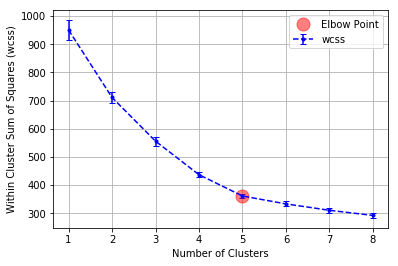

In [78]:
plt.errorbar([1,2,3,4,5,6,7,8],wcss_all,yerr = wcss_errors,marker = '.', fmt = '--',
            color = "blue",capsize = 3,label = "wcss")

plt.plot(5,wcss_all[4], 'o', markersize = 13, color = 'red', alpha = 0.5, label = 'Elbow Point')

plt.grid()
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares (wcss)")


plt.legend()

plt.savefig("Figures//LDA_BBC//Elbow_Curve_Graph.pdf")


In [ ]:
secondDerivative[i] = x[i+1] + x[i-1] - 2 * x[i]


In [54]:
sd = []
x = wcss_all
for i in range(1,len(wcss_all)-1):
    sd.append(x[i+1] + x[i-1] - 2 * x[i])
    
    

In [55]:
sd

[84.5659502046442,
 36.0671320842323,
 43.59113034282905,
 47.502271767552884,
 5.332794425467341,
 4.523922909377802]

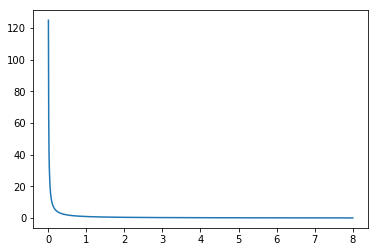

In [68]:
space = np.linspace(0,8,1000)

plt.plot(space, 1/space)

In [58]:
from sklearn.metrics import silhouette_score


for n_cluster in range(2, 8):
    kmeans = KMeans(n_clusters=n_cluster).fit(distance_matrix1)
    label = kmeans.labels_
    sil_coeff = silhouette_score(distance_matrix1, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))



For n_clusters=2, The Silhouette Coefficient is 0.2946343907593004
For n_clusters=3, The Silhouette Coefficient is 0.22249702302736338
For n_clusters=4, The Silhouette Coefficient is 0.2528718825714655
For n_clusters=5, The Silhouette Coefficient is 0.25163819568076545
For n_clusters=6, The Silhouette Coefficient is 0.22628310398498222
For n_clusters=7, The Silhouette Coefficient is 0.199009548683107


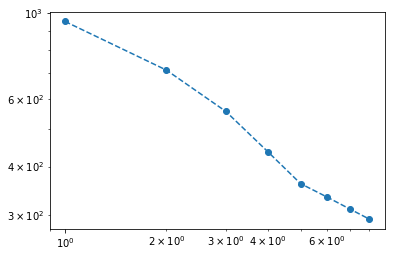

In [65]:
plt.loglog([1,2,3,4,5,6,7,8],wcss_all,'o--')